In [5]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [10]:
# load file 
df = pd.read_csv('canada_capita.csv')

# rename columns 
df.rename(columns={'year':'year', 'per capita income (US$)':'PCI'}, inplace=True)

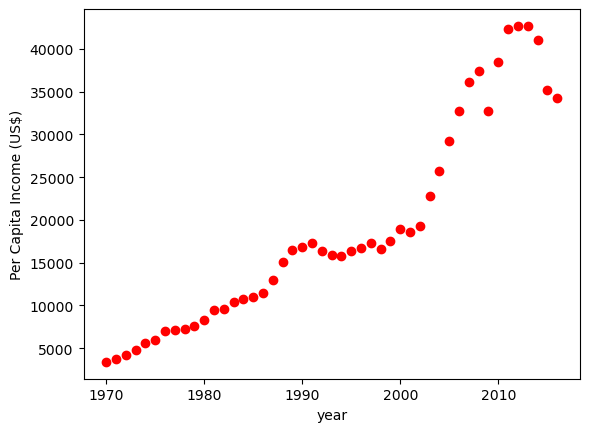

In [11]:
# create a plot of the data points
%matplotlib inline
plt.xlabel('year')
plt.ylabel('Per Capita Income (US$)')
plt.scatter(df['year'], df['PCI'], color='red')

In [12]:
# load the Linear Regression Model 
model = linear_model.LinearRegression()

# Fit the data into Model
model.fit(df[['year']], df[['PCI']])

# predict
model.predict([[2017]])

/home/fahad/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[38803.29886875]])

In [ ]:
# plot the regression line 

plt.xlabel('year')
plt.ylabel('Per Capita Income (US$)')
plt.scatter(df['year'], df['PCI'], color='red')
plt.plot(df['year'], model.predict(df[['year']]), color='blue')

### We can do Reshape to make it 2D array 

In [ ]:
x = df["year"].values.reshape(-1,1)
y = df["PCI"].values.reshape(-1,1)

print(x)

### Or we can just use df[['column_name']] to make it 2D array

In [56]:
# model accuracy 
# model.score(x,y)
model.score(df[['year']],df['PCI'])


0.890916917957032

## Read extra add and fill it with predicted value

In [33]:
df2 = pd.read_csv('more_data.csv')

In [34]:
df2

,year
0,2017
1,2018
2,2019
3,2020
4,2021
5,2022
6,2023


In [38]:
new_pred = model.predict(df2)
new_pred

array([[38803.29886875],
       [39631.76394397],
       [40460.22901919],
       [41288.69409442],
       [42117.15916964],
       [42945.62424486],
       [43774.08932009]])

In [39]:
df2['Per Capita Income (US$)'] = new_pred

In [41]:
df2.to_csv('more_data.csv', index=False)

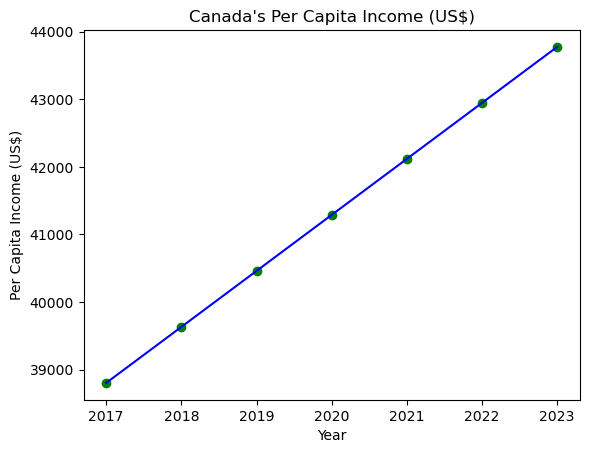

In [43]:
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.title("Canada's Per Capita Income (US$)")
plt.scatter(df2['year'], df2['Per Capita Income (US$)'], color='green')
plt.plot(df2['year'], df2['Per Capita Income (US$)'], color='blue')

# Main Problem Solution **Done**. The following part is Extra!

In [57]:
# let's predict data for next 20 years

new_year = [x for x in range(2017, 2039, 1)]
df2 = pd.DataFrame({'year': new_year})
prediction = model.predict(df2[['year']])       # you have to use labeled data like df2


# print the values
for n,p in zip(new_year, prediction):
    print(n,p)


2017 [38803.29886875]
2018 [39631.76394397]
2019 [40460.22901919]
2020 [41288.69409442]
2021 [42117.15916964]
2022 [42945.62424486]
2023 [43774.08932009]
2024 [44602.55439531]
2025 [45431.01947053]
2026 [46259.48454575]
2027 [47087.94962098]
2028 [47916.4146962]
2029 [48744.87977142]
2030 [49573.34484664]
2031 [50401.80992187]
2032 [51230.27499709]
2033 [52058.74007231]
2034 [52887.20514754]
2035 [53715.67022276]
2036 [54544.13529798]
2037 [55372.6003732]
2038 [56201.06544843]


In [58]:
# check whether the output is correct
print(model.intercept_)
print(model.coef_)

[-1632210.75785546]
[[828.46507522]]


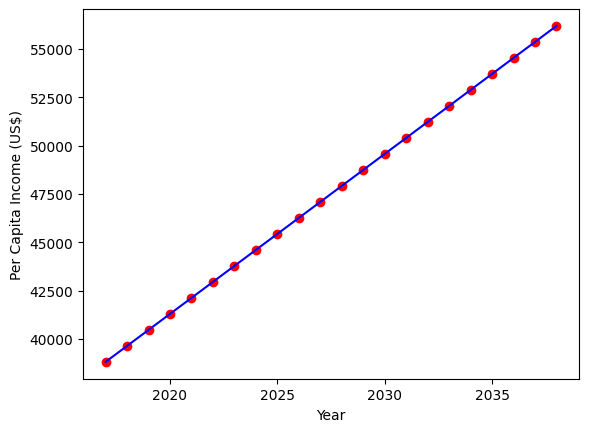

In [59]:
# let's plot the prediction of new data 
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.scatter(new_year, prediction, color='red', label='Data Points')
plt.plot(new_year, prediction, color='blue', label='Linear Regression Line')


## We can observe the following assumption is not right, let's see another approaches to get the future PCI (US$)